# The birthday paradox
The Birthday Paradox is the surprisingly high probability that two people will have the same birthday even in a small group of people. 
The term paradox is not the most appropriate term to define the phenomenon, as it is merely something *interesting*, but we are not here to discuss semantics. As an example, it takes a group as small as 23 people to have a 50% chance of a matching birthday. 

Write a program to simulate several probability experiments (runs) to determine the percentages for groups of different sizes.

Before starting to code your solution, let's highlight a few aspects you may want to brainstorm in advance:
- How many runs do we want to perform?
- How many dates do we want to randomly sample for each run?
- Which parts of the code could be factored out in separate functions?
- Do we have to (or do we want to) store all the generated birthdays? In which data structure?

The idea to verify this paradox is the following: the first part of the code is written in order to verify that in a group of 23 person, the probability of finding two people whose birthday are coming up in the same day is 50%. To do this a function called Probability_check is realized, which takes in input the interval of people and run considered. Then, it randomly generates a selection of dates equal to the set of people considered for a number of run. During this procedure it is checked if two dates are the same and in case of a positive answer, a counter previously created is updated, increasing by one. Once the predefined number of run is reached, the ratio between the counter and the number of run is calcatuted, in order to determine the probability whereby a data repetion occurs. To be more specific set of people varies from 2 to 101 while to get a reliable result the number of run varies from 20 to 200,increasing by 20 run for each time. For each number of people, ten probabilities will be created, collected in a single value by averaging these latter.

Insert the minimum number of people taken into account: 2
Insert the maximum number of people taken into account: 101
Insert the minimum number of run to get a probability: 20
Insert the maximum number of run to get a probability: 200
Insert the interval between run: 10


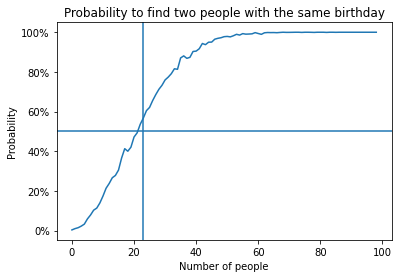

In [4]:
from datetime import date,timedelta
from random import choices
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

starting_date, final_date= date(2022,1,1),date(2022,12,31)
init_people=(input('Insert the minimum number of people taken into account: '))
fin_people=(input('Insert the maximum number of people taken into account: '))
init_run=input('Insert the minimum number of run to get a probability: ')
fin_run=input('Insert the maximum number of run to get a probability: ')
inter_run=input('Insert the interval between run: ')

def Probability_check(init_people,fin_people,init_run,fin_run,inter_run):
    if init_people.isnumeric() and fin_people.isnumeric() and init_run.isnumeric() and fin_run.isnumeric() and inter_run.isnumeric():
        init_people=int(init_people)
        fin_people=int(fin_people)
        init_run=int(init_run)
        fin_run=int(fin_run)
        inter_run=int(inter_run)
        
        starting_date, final_date= date(2022,1,1),date(2022,12,31)
        res_dates = [starting_date]
        while starting_date != final_date:
            starting_date += timedelta(days=1)
            res_dates.append(starting_date)
        
        if init_run<fin_run and fin_run%inter_run==0:
            number_of_experiments=[*range(init_run,fin_run,inter_run)]
           
            All_prob=[]
            All_prob_avg=[]
            while init_people<fin_people: 
                all_prob=[]
                for i in range(int(len(number_of_experiments))):
                    start=0
                    count=0
                    while start<number_of_experiments[i]:
                        res = choices(res_dates, k=init_people)
                        for j in range(int(len(res))):
                            ref_date=res[j]
                            all_date=res[j+1:]
                            if ref_date in all_date:
                                count+=1
                                break
                        start+=1
                    prob=count/number_of_experiments[i]
            
                    all_prob.append(prob)
                All_prob.append(all_prob)
                prob_avg=mean(all_prob)
                All_prob_avg.append(prob_avg)
                init_people+=1
            plt.plot(All_prob_avg)
            plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
            plt.title('Probability to find two people with the same birthday')
            plt.xlabel('Number of people')
            plt.ylabel('Probability')
            plt.axvline(x=23)
            plt.axhline(y=0.5)
            plt.show()
    pass

if __name__ == '__main__':
    Probability_check(init_people,fin_people,init_run,fin_run,inter_run)




Thanks to the previous chart, it is easy to check that the initial hypothesis is verified. In this regard, it is easy to know that, increasing the number of run the results will be near to the expected value. This is a phenomenon similar to that of coin toss, for which for a limited number of throws it is easy to ascertain a higher number of head or tails, but increasing the number of throws an equal distribution will occur. So, a second function called Prob_verification, which takes as inputs the minimum and maximum number of runs, will be created in order to let see as increasing number of run, the probability will be near to 50%.

Insert the minimum number of run to get a probability: 2
Insert the maximum number of run to get a probability: 1000
Insert the interval between run: 1


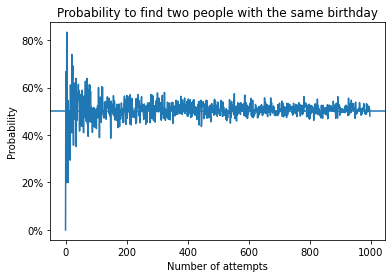

In [5]:
init_ver=input('Insert the minimum number of run to get a probability: ')
fin_ver=input('Insert the maximum number of run to get a probability: ')
inter_ver=input('Insert the interval between run: ')

def Prob_verification(init_ver,fin_ver,inter_ver):
    if init_ver.isnumeric() and fin_ver.isnumeric() and inter_ver.isnumeric():
        init_ver=int(init_ver)
        fin_ver=int(fin_ver)
        inter_ver=int(inter_ver)
        verification_people=23
        starting_date, final_date= date(2022,1,1),date(2022,12,31)
        res_dates = [starting_date]
        while starting_date != final_date:
            starting_date += timedelta(days=1)
            res_dates.append(starting_date)
        
        if init_ver<fin_ver and fin_ver%inter_ver==0:
            number_of_experiments=[*range(init_ver,fin_ver,inter_ver)]
           
            All_prob_ver=[]

            for i in range(int(len(number_of_experiments))):
                start=0
                count=0
                while start<number_of_experiments[i]:
                    res = choices(res_dates, k=verification_people)
                    for j in range(int(len(res))):
                        ref_date=res[j]
                        all_date=res[j+1:]
                        if ref_date in all_date:
                            count+=1
                            break
                    start+=1
                
                prob=count/number_of_experiments[i]
        
                All_prob_ver.append(prob)
            

            plt.plot(All_prob_ver)
            plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
            plt.title('Probability to find two people with the same birthday')
            plt.xlabel('Number of attempts')
            plt.ylabel('Probability')
            plt.axhline(y=0.5)
            plt.show()
    pass

if __name__ == '__main__':
    Prob_verification(init_ver,fin_ver,inter_ver)

